In [127]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = fetch_openml(name='credit-g', as_frame=True)

C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(


In [128]:
df = data.data
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [129]:
df.isna().mean()

checking_status           0.0
duration                  0.0
credit_history            0.0
purpose                   0.0
credit_amount             0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_credits          0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
dtype: float64

In [130]:
df.duplicated().sum()

0

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [132]:
df.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
dtype: int64

<AxesSubplot:>

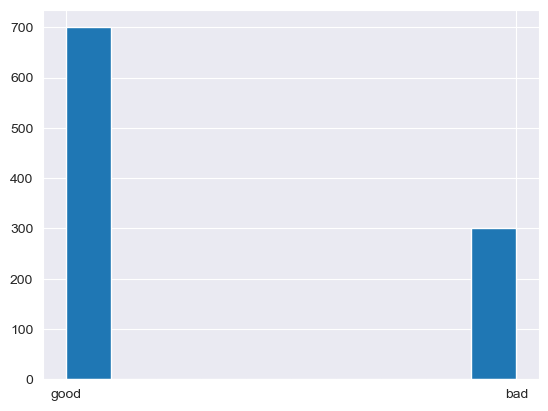

In [133]:
data.target.hist()

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline


def train_model(_model, categorical_cols, X, y):
    transform = ColumnTransformer([('onehot', OneHotEncoder(drop='if_binary'), categorical_cols)])
    return make_pipeline(transform, StandardScaler(with_mean=False), _model).fit(X, y)

In [137]:
num_columns = df.describe().columns
cat_cols = df.select_dtypes(include=['category']).columns
num_columns, cat_cols

(Index(['duration', 'credit_amount', 'installment_commitment',
        'residence_since', 'age', 'existing_credits', 'num_dependents'],
       dtype='object'),
 Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
        'employment', 'personal_status', 'other_parties', 'property_magnitude',
        'other_payment_plans', 'housing', 'job', 'own_telephone',
        'foreign_worker'],
       dtype='object'))

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_neighbors': np.linspace(3, 20, dtype=int)
}, {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}]
for param_grid, model in zip(param_grid, [KNeighborsClassifier(), SVC()]):
    search = train_model(GridSearchCV(model, param_grid=param_grid, cv=8), cat_cols, X_train, y_train)
    search.fit(X_train, y_train)
    print(search[-1].best_params_)

{'n_neighbors': 9}
{'kernel': 'poly'}


KNeighborsClassifier: CPU times: total: 31.2 ms
Wall time: 35.7 ms


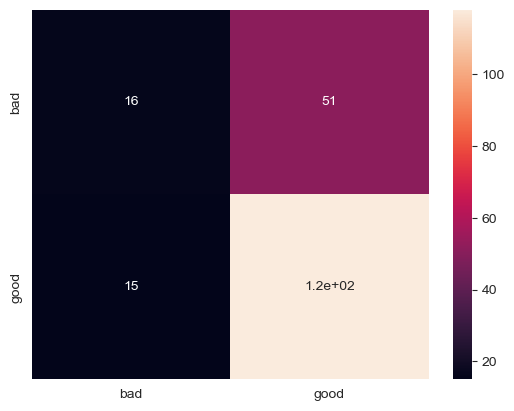

LogisticRegression: CPU times: total: 46.9 ms
Wall time: 72.8 ms


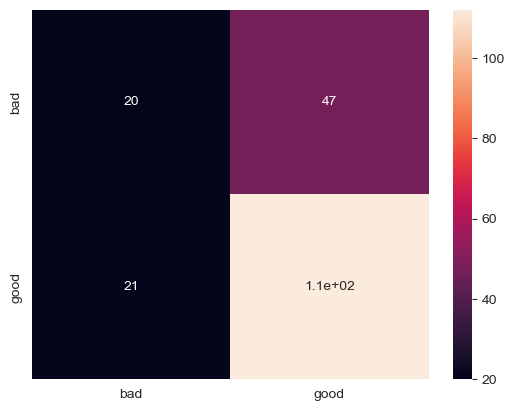

SVC: CPU times: total: 78.1 ms
Wall time: 85.2 ms


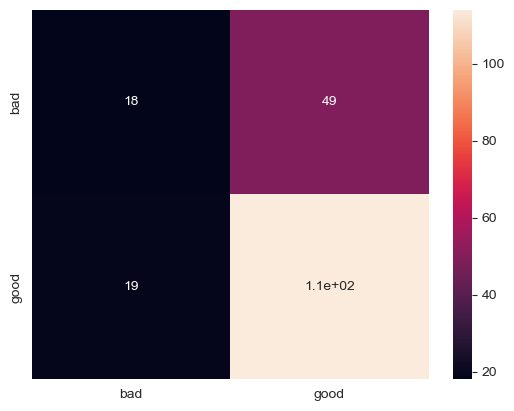

In [143]:
models = [KNeighborsClassifier(n_neighbors=12), LogisticRegression(), SVC(kernel='poly')]
result = []
for model in models:
    print(model.__class__.__name__, end=": ")
    % time result.append((y_test, train_model(model, cat_cols, X_train, y_train).predict(X_test)))
    cm = confusion_matrix(*result[-1])
    sns.heatmap(pd.DataFrame(cm, columns=['bad', 'good'], index=['bad', 'good']), annot=True)
    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for y_true, y_pred in result:
    print(classification_report(y_true, y_pred, target_names=models[0].classes_))

ValueError: not enough values to unpack (expected 2, got 0)